In [1]:
print('')

aim to plot change in gradient as consider changing minimum magntiude of data

In [83]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import pandas as pd
import math
from scipy import stats
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from spearman_plotting_func import *

change magnitude limits, colors in functions file

In [5]:
filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20']


'''filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new',
              'eq_object_03s_bandpass_01_19_snr_20_blank_005_new',
              'eq_object_03s_bandpass_01_19_snr_20_blank_01_new']

filenames = ['eq_object_05s_bandpass_01_19_snr_20_blank_0_new',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new',
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new']'''

filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr5',
             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new_snr5',
              'eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr20',
             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new_snr20']


In [77]:
%matplotlib inline
n_stations = 0
min_dist = 0
max_dist = 200
for f in filenames[0:1]:
    print(f)
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database_hypo/{f}')

    iv2_gradt = []
    iv2_gradt_std = []
    iv2_n = []
    tp_gradt = []
    tp_gradt_std = []
    tp_n = []
    pgd_gradt = []
    pgd_gradt_std = []
    pgd_n = []
    tc_gradt = []
    tc_gradt_std = []
    tc_n = []

    for n_stations in range(0,7):
        for min_dist in [0]: #range(0, 100, 10):
            options = {'n': n_stations, 'min_dist': min_dist, 'max_dist': max_dist}
            x_tp, y_tp = calc_tp_mag_lim(df, 3.,**options)
            x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.,**options)
            x_tc, y_tc = calc_tc_mag_lim(df, 3.,**options)
            x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.,**options)


            gradt, intercept, gradt_std, intercept_std = [],[],[],[]
            pearson = []
            spearman = []
            spearman_p = []
            n_l = []

            for mag_lim in magnitudes:
                x, y = calc_tp_mag_lim(df, mag_lim,**options)
                gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
            #tp_params = [gradt, gradt_std, np.array(pearson)**2, spearman, spearman_p, n, 'tp']
            #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'tp', False)
            tp_gradt.append(gradt[0])
            tp_gradt_std.append(gradt_std[0])
            tp_n.append(n[0])


            gradt, intercept, gradt_std, intercept_std = [],[],[],[]
            pearson = []
            spearman = []
            spearman_p = []
            n_l = []

            for mag_lim in magnitudes:
                x, y = calc_pgd_mag_lim(df, mag_lim,**options)
                gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
            #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', False)
            #pgd_params = [gradt, gradt_std, np.array(pearson)**2, spearman, spearman_p, n,  'pgd']
            pgd_gradt.append(gradt[0])
            pgd_gradt_std.append(gradt_std[0])
            pgd_n.append(n[0])

            gradt, intercept, gradt_std, intercept_std = [],[],[],[]
            pearson = []
            spearman = []
            spearman_p = []
            n_l = []

            for mag_lim in magnitudes:
                x, y = calc_tc_mag_lim(df, mag_lim,**options)
                gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
            #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', False)
            #tc_params = [gradt, gradt_std, np.array(pearson)**2, spearman, spearman_p, n, 'tc']
            tc_gradt.append(gradt[0])
            tc_gradt_std.append(gradt_std[0])
            tc_n.append(n[0])

            gradt, intercept, gradt_std, intercept_std = [],[],[],[]
            pearson = []
            spearman = []
            spearman_p = []
            n_l = []

            for mag_lim in magnitudes:
                x, y = calc_iv2_mag_lim(df, mag_lim,**options)
                #print(len(x[y==0]))
                gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
            #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'iv2', False)
            #iv2_params = [gradt, gradt_std, np.array(pearson)**2, spearman, spearman_p, n,'iv2']
            iv2_gradt.append(gradt[0])
            iv2_gradt_std.append(gradt_std[0])
            iv2_n.append(n[0])

            #plot_data_subplots_line([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f, tp_params, pgd_params, tc_params, iv2_params)
            # plot_spearman_subplots_all_on_one_no_n_shaded_percent_var(f, tp_params, pgd_params, iv2_params, tc_params, log = False, save = True, **options)
            #print(tp_params[4][0], tc_params[4][0])
            #plot_spearman_subplots_all_on_one(f, gradt, gradt_std, spearman, spearman_p, n, 'iv2', True)
    #test_overlap_subplots([[tp_gradt, tp_gradt_std], [pgd_gradt, pgd_gradt_std], [tc_gradt, tc_gradt_std], [iv2_gradt, iv2_gradt_std]], ['tp', 'pgd', 'tc', 'iv2']) #, f, **options)


eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20


In [94]:
def test_overlap_subplots(params, param_names = []):

    if param_names == []:
        param_names = ['tp', 'tc', 'iv2', 'pgd']
    colors = {'tp': '#7f58af', 'tc': '#e84d8a', 'iv2': '#64c5eb', 'pgd': '#7fb646'}
    colors_darker = {'tp': '#251A32', 'tc': '#5c2037', 'iv2': '#2b5160', 'pgd': '#39511f'}
    hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
    fig, axs = plt.subplots(2, 2, figsize = (20, 15))
    line_transparancy = 0.5
    marker = ''
    for i, p in enumerate(params):
        print(i)
        param_name = param_names[i]
        param_color = colors[param_name]
        # flip_color = colors_darker[param_name]

        row, col = i//2, i%2
        count = 1
        for sta in range(1, len(p[0])):
            mu = p[0][sta]
            sigma = p[1][sta]

            transparancy = count
            x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
            pdf = stats.norm.pdf(x, mu, sigma)
            axs[row][col].plot(x, pdf, color = param_color, alpha = transparancy)#, label = sta)#, zorder = 1000)
            axs[row][col].fill_between(x, pdf, color = param_color, alpha = transparancy, hatch = hatches[sta], label = f'stations: {sta}, n: {p[2][sta]}')
            axs[row][col].vlines(p[0][sta], 0, max(pdf), color = 'white', linestyle = '-', alpha = line_transparancy)

            difference_array = np.absolute(x-(p[0][sta]-p[1][sta]))
            index = difference_array.argmin()
            axs[row][col].vlines(p[0][sta]-p[1][sta], 0, pdf[index], color = 'white', linestyle = '--', alpha = line_transparancy)
            axs[row][col].vlines(p[0][sta]+p[1][sta], 0, pdf[100-index], color = 'white', linestyle = '--', alpha = line_transparancy)

            difference_array = np.absolute(x-(p[0][sta]-2*p[1][sta]))
            index = difference_array.argmin()
            axs[row][col].vlines(p[0][sta]-2*p[1][sta], 0, pdf[index], color = 'white', linestyle = ':', alpha = line_transparancy)
            axs[row][col].vlines(p[0][sta]+2*p[1][sta], 0, pdf[100-index], color = 'white', linestyle = ':', alpha = line_transparancy)

            axs[row][col].set_xlabel(f'{param_name}')#, 1/2 s.d. {marker}, \n flip = {p[0][flip]:.4f}, \n 1 s.d. = [{p[0][0]-1*p[1][0]:.4f}, {p[0][0]+1*p[1][0]:.4f}], \n 2 s.d. = [{p[0][0]-2*p[1][0]:.4f}, {p[0][0]+2*p[1][0]:.4f}]')
            axs[row][col].legend(loc = 'upper right')
            count -= 0.14
    # fig.plot([], [], color='k', label='significant')
    # fig.plot([], [], color='k', linestyle=':', label='insignificant')
    #fig.legend()

    #fig.suptitle('overlap: ' + marker[:-1])
    fig.tight_layout()
    # fig.savefig(f'/Users/rebecca/Documents/PhD/Research/Frequency/seismo_det/figures/overlaps/hypocentral/{f}_overlap_{marker[:-1]}.png')
    plt.show()


0
1
2
3


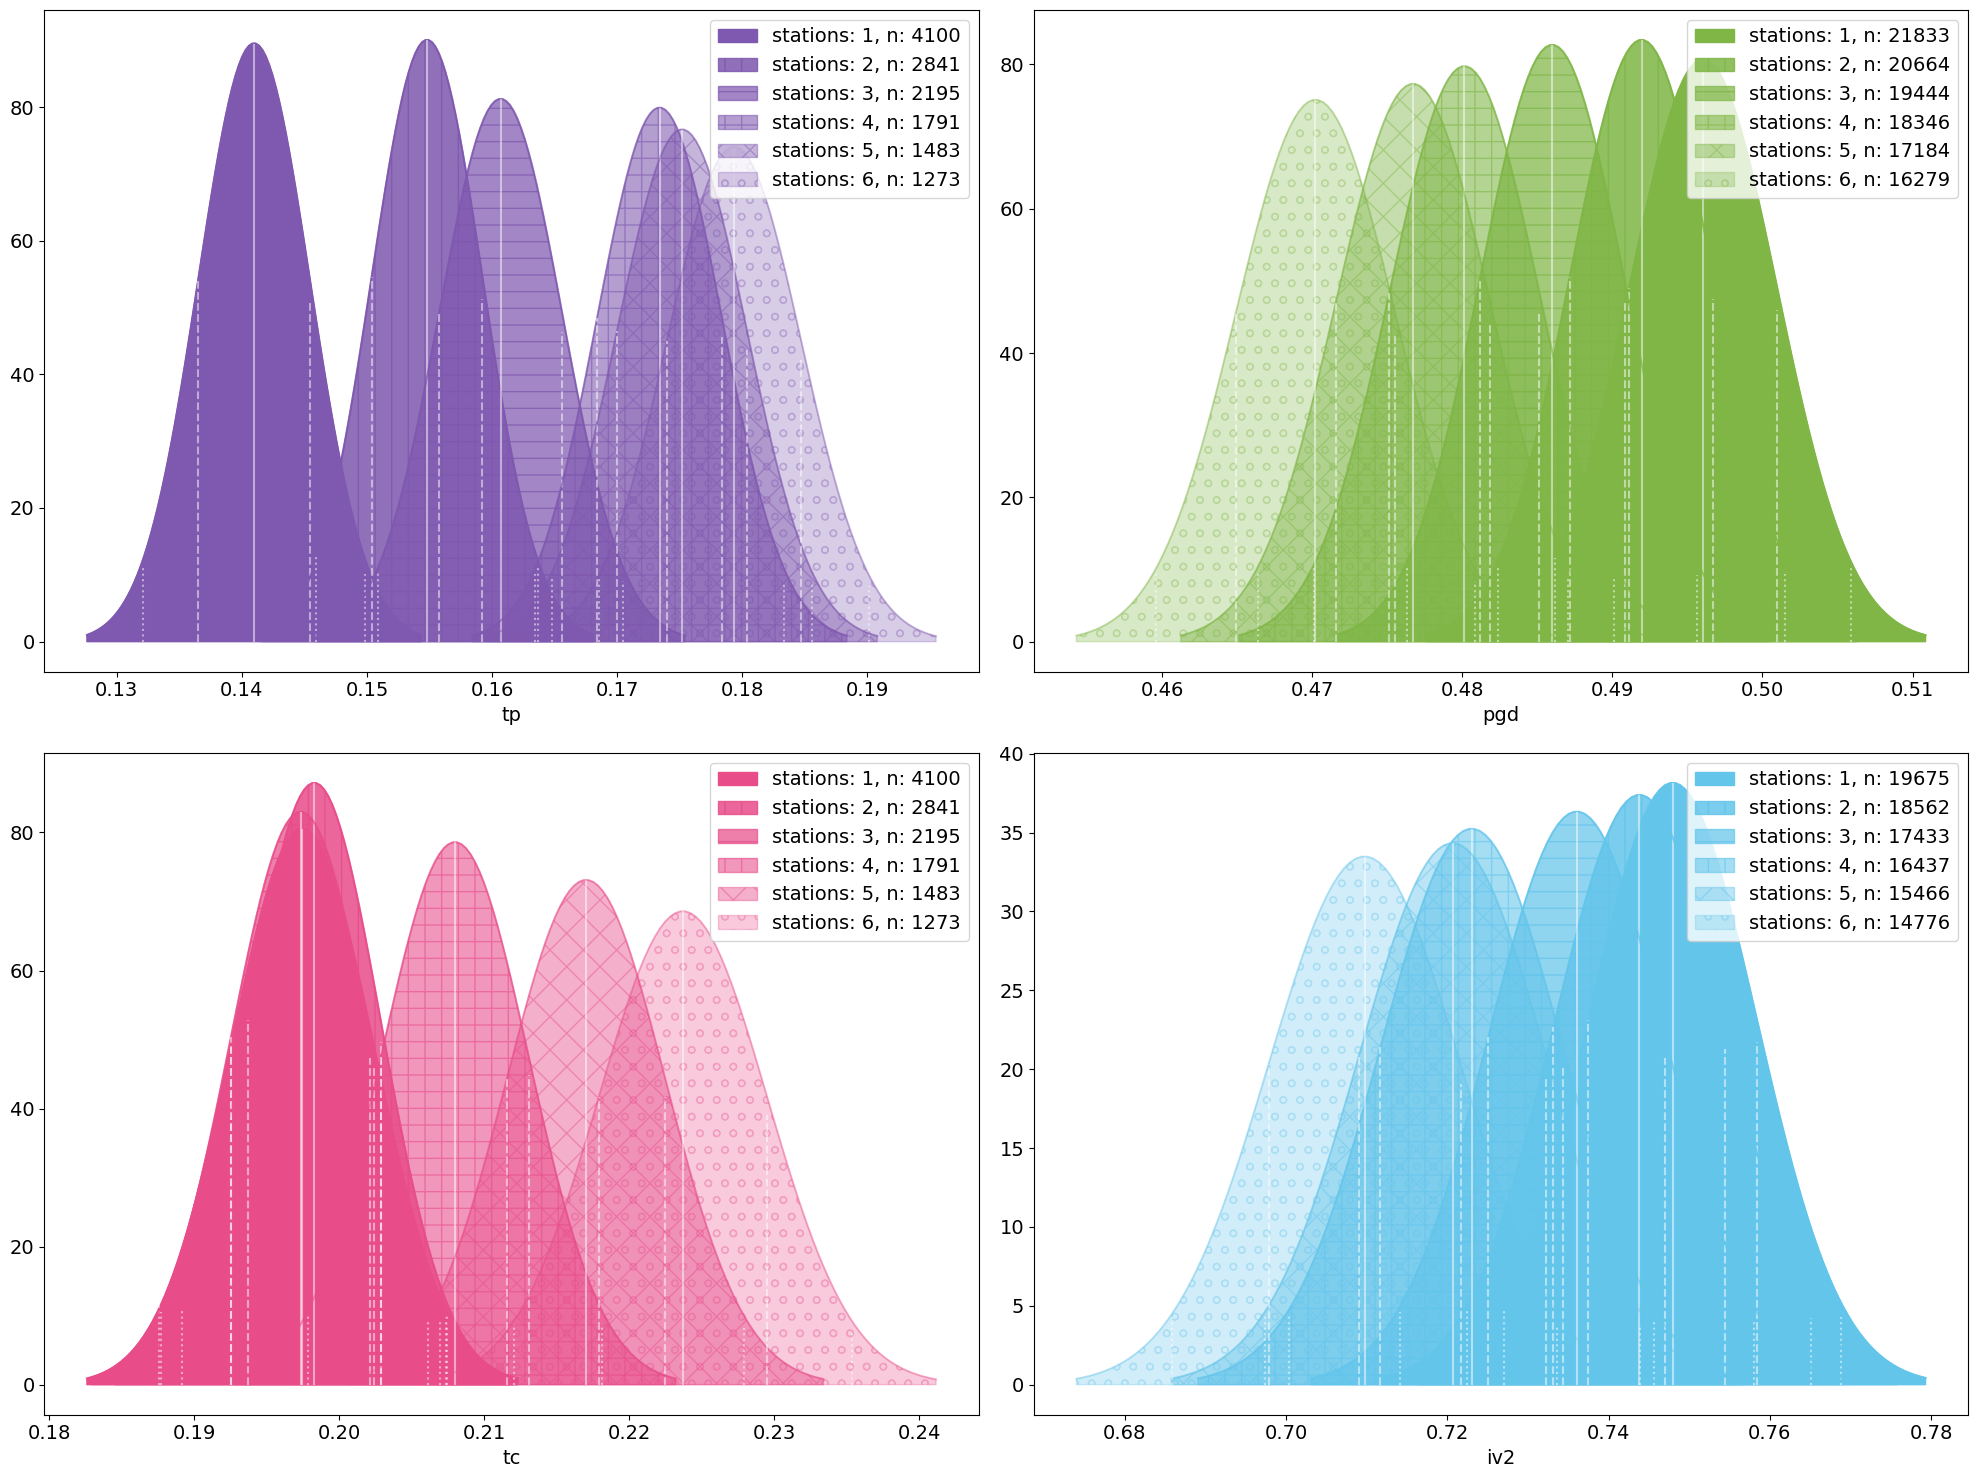

In [95]:
test_overlap_subplots([[tp_gradt, tp_gradt_std, tp_n], [pgd_gradt, pgd_gradt_std, pgd_n], [tc_gradt, tc_gradt_std, tc_n], [iv2_gradt, iv2_gradt_std, iv2_n]], ['tp', 'pgd', 'tc', 'iv2'])